# Good Life fitness

---

## Importing libraries and the data

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv("C:/Users/binkh/Downloads/problem1.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


---

## EDA

In [213]:
df.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

In [214]:
df.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [215]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [216]:
import pandas as pd
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["date_numeric"] = df["date"].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
print(df.dtypes)

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
date_numeric            float64
dtype: object


C:\Users\binkh\AppData\Local\Temp\ipykernel_39020\1493589257.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["date"] = pd.to_datetime(df["date"], errors='coerce')


In [217]:
df = df.drop(columns= "date")

<Axes: >

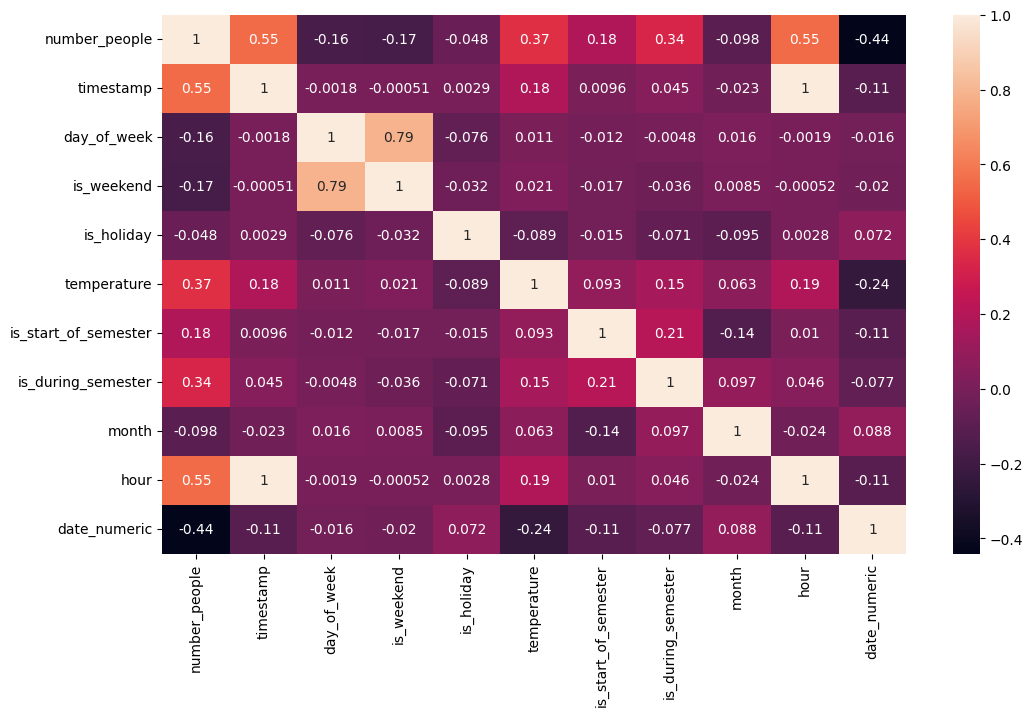

In [239]:
plt.figure(figsize=(12,7))
cor_matrix = df.corr()
sns.heatmap(cor_matrix,annot=True)

##### _since the correlation between the number of people and the date is a negative correlation, and we are measuring the correlation with the target which is number of people, for the next steps we will focus on the highest corelation with the number of people_ 

---

In [219]:
num_df = df[["number_people","timestamp","day_of_week","is_weekend","is_holiday","temperature","is_start_of_semester","is_during_semester","month","hour"]]

In [220]:
num_df.dtypes

number_people             int64
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

<Axes: >

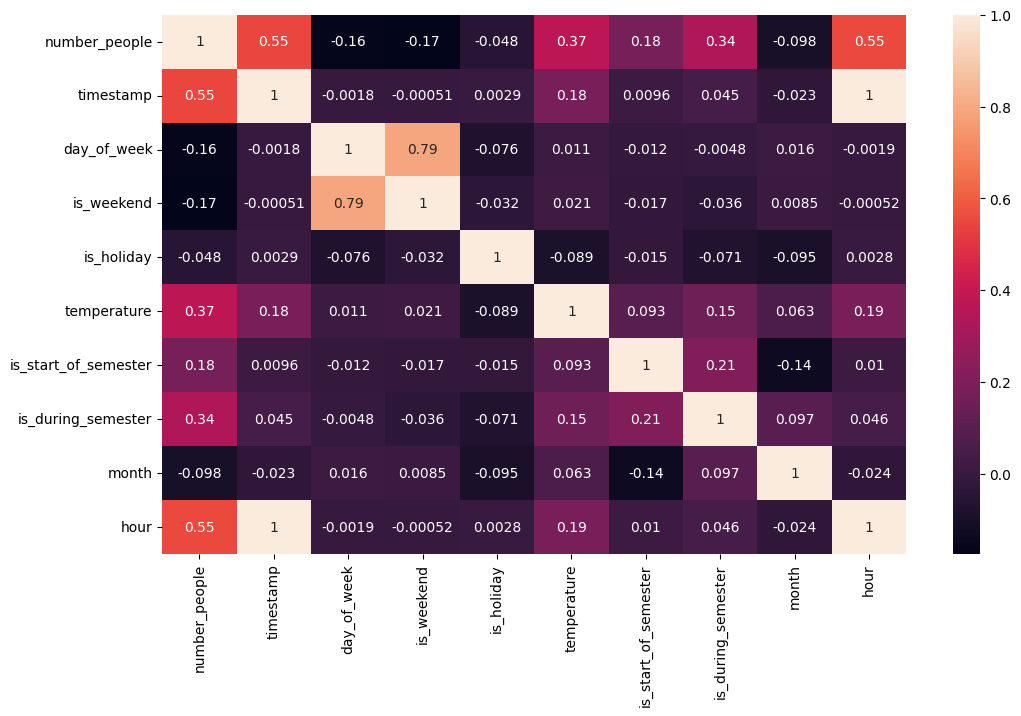

In [238]:
plt.figure(figsize=(12,7))
cor_matrix = num_df.corr()
sns.heatmap(cor_matrix,annot=True)

<Axes: >

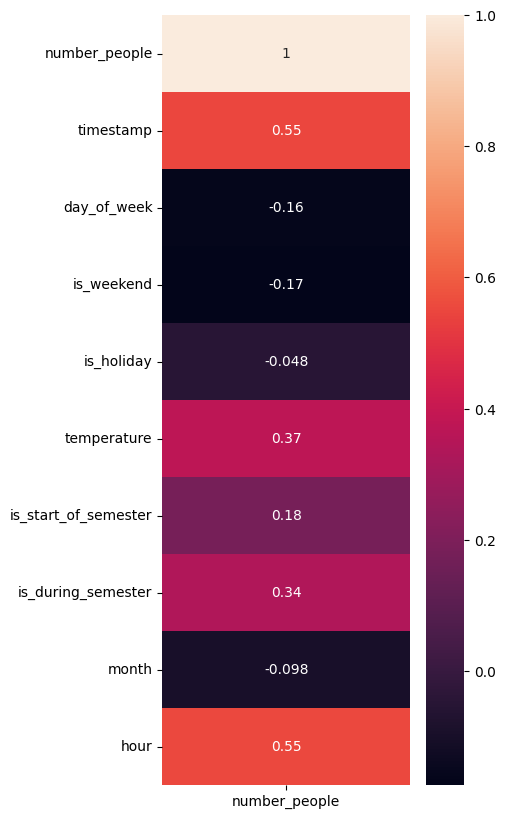

In [222]:
plt.figure(figsize=(4,10))
cor_matrix2 = num_df.corr()[["number_people"]]
sns.heatmap(cor_matrix2,annot=True)

<li>There is a high positive correlation between the number of people & => hour/timestamp</li>
<li>There is also a positive correlation between the number of people & => temperature</li>
<li>There is also a positive correlation between the number of people & => is_during_semester</li>

##### _We will start analyzing one by one ..._

---

### number of people & hour/timestamp

In [223]:
hour_count = num_df.groupby('hour')["number_people"].sum()

hour
0      43837
1       4284
2        271
3        220
4        401
5       2551
6      24169
7      42962
8      67304
9      84502
10     94320
11    101089
12    101290
13     97219
14     94566
15    103335
16    120630
17    138673
18    137021
19    126125
20    116467
21    119282
22    112287
23     75042
Name: number_people, dtype: int64


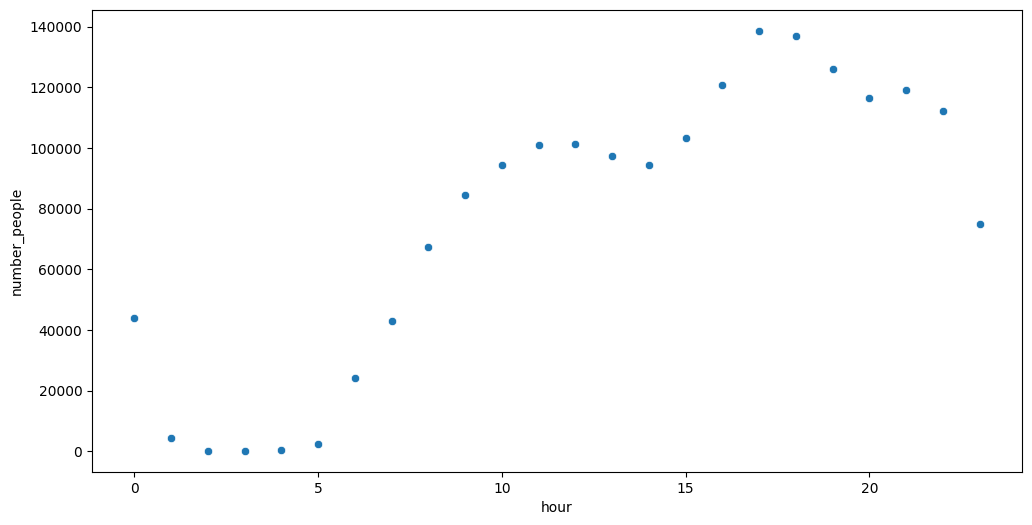

In [224]:
plt.figure(figsize=(12,6))
sns.scatterplot(hour_count)
print (hour_count)

##### _highest number of people starts from __15:00 to 22:00__ with the Peak of people coming at __17:00 PM__ => 138673 people_

---

### number of people &  temperature

<Axes: xlabel='temperature', ylabel='number_people'>

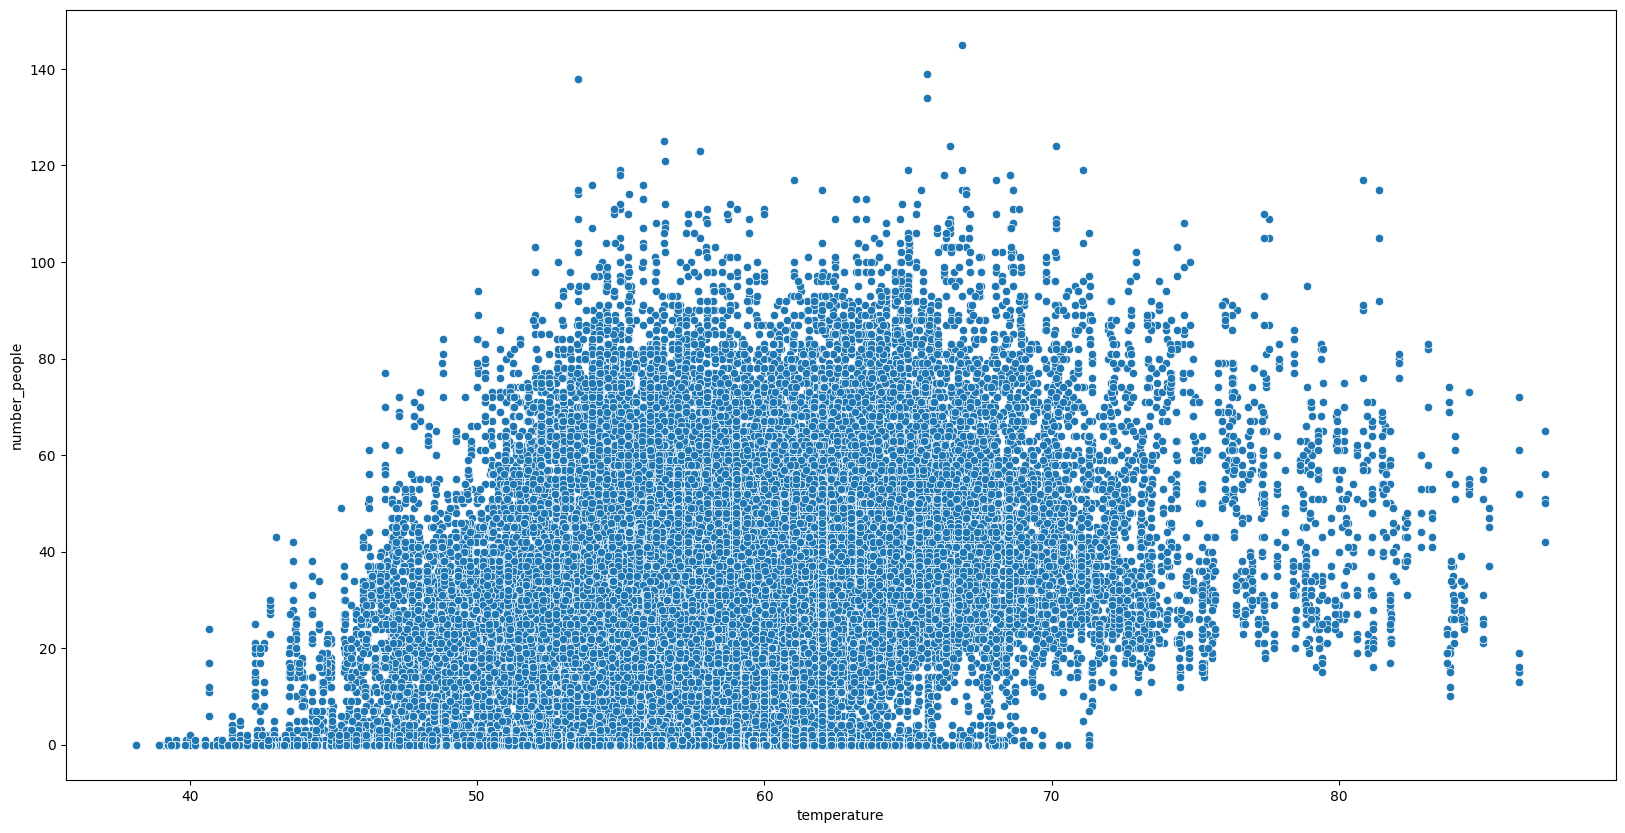

In [225]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = num_df["temperature"], y = num_df["number_people"])

##### _As the number of people increases, the temperature increases. This proofs the positive corelation illustrated in the corelation matrix_

---

### number of people & is_during_semester

In [226]:
dur_sem = num_df["is_during_semester"].value_counts()

is_during_semester
1    41055
0    21129
Name: count, dtype: int64

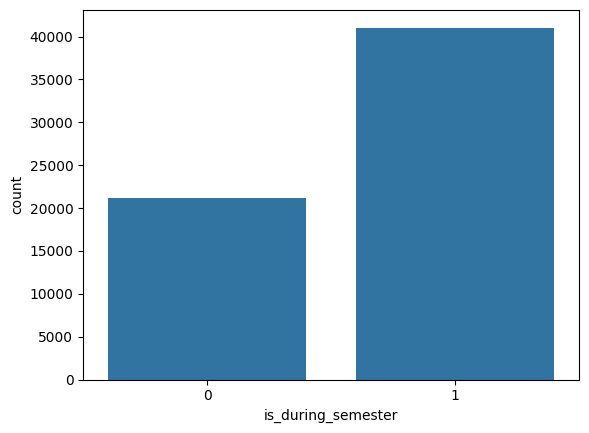

In [227]:
sns.barplot(dur_sem)
dur_sem

##### _If the value is 1, then it is during the semester. So 41055 out of 62184 records are during the semester which is 66%_

---

### number of people per day

In [228]:
days__records = num_df["day_of_week"].value_counts()
days__records

day_of_week
1    9130
2    8981
3    8926
0    8838
5    8822
6    8768
4    8719
Name: count, dtype: int64

day_of_week
1    296140
2    291356
0    288590
3    269721
4    261196
5    202524
6    198320
Name: number_people, dtype: int64


<Axes: xlabel='day_of_week', ylabel='number_people'>

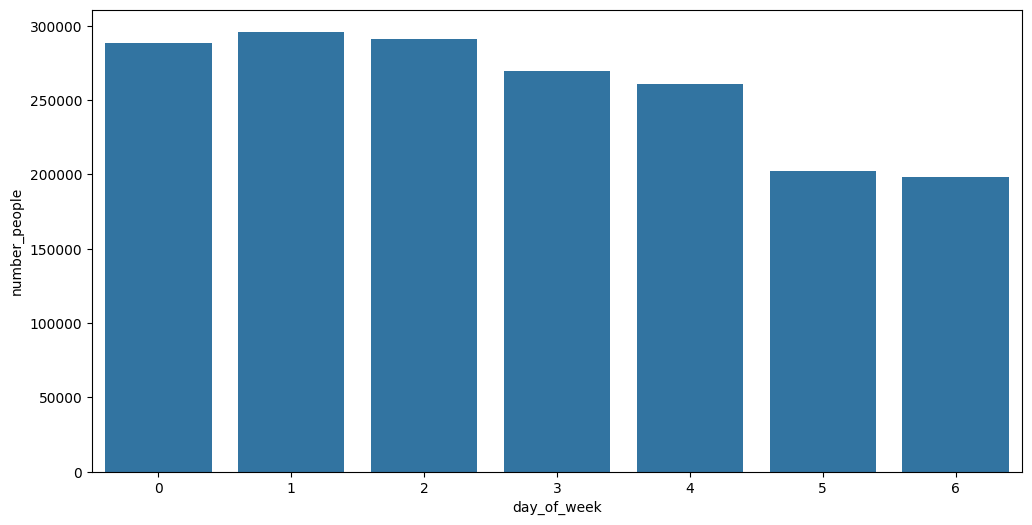

In [229]:
days_num_people = num_df.groupby("day_of_week")["number_people"].sum().sort_values(ascending=False)
print (days_num_people)
plt.figure(figsize=(12,6))
sns.barplot(days_num_people)

##### day_of_week (int; 0 [monday] - 6 [sunday]) ,so the order is as follows;
<li>Tue</li>
<li>Wed</li>
<li>Mon</li>
<li>Thu</li>
<li>Fri</li>
<li>Sat</li>
<li>Sun</li>

##### _Highest at Tuesday and the lowest at Sunday_

---

### number of people per month

month
1     135378
2     140678
3     144068
4     105865
5      83911
6      80018
7      92188
8     162845
9     268381
10    245244
11    204817
12    144454
Name: number_people, dtype: int64

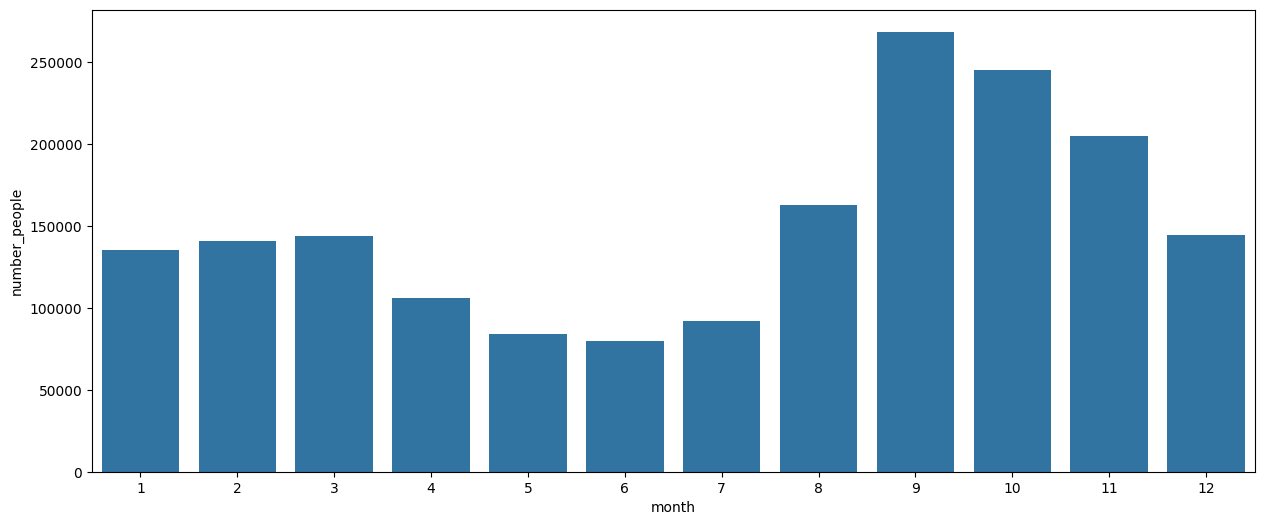

In [230]:
month_num_people = num_df.groupby("month")["number_people"].sum()
plt.figure(figsize=(15,6))
sns.barplot(month_num_people)
month_num_people

---

### Set splitting and Model Building => Linear Regression) 

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# X = df.drop(columns=['number_people', 'date']) 
y = df['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Linear Regression:")
MAE_LR = mean_absolute_error(y_test, y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
R2_LR = r2_score(y_test, y_pred)
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression:
MAE: 12.089515902647673
RMSE: 15.830126673747124
R2 Score: 0.5151513477490952


---

### Set splitting and Model Building => RandomForest

In [232]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
MAE_RF = mean_absolute_error(y_test, y_pred_rf)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
RMSE_RF = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
R2_RF = r2_score(y_test, y_pred_rf)
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 4.34985556410659
RMSE: 6.512617366809702
R2 Score: 0.9179367829053184


---

### Set splitting and Model Building => XGBoost

In [233]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:")
MAE_XG = mean_absolute_error(y_test, y_pred_xgb)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
RMSE_XG = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
R2_XG = r2_score(y_test, y_pred_xgb)
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MAE: 7.007246494293213
RMSE: 10.227161923203228
R2 Score: 0.7976292967796326


### Feature Importance

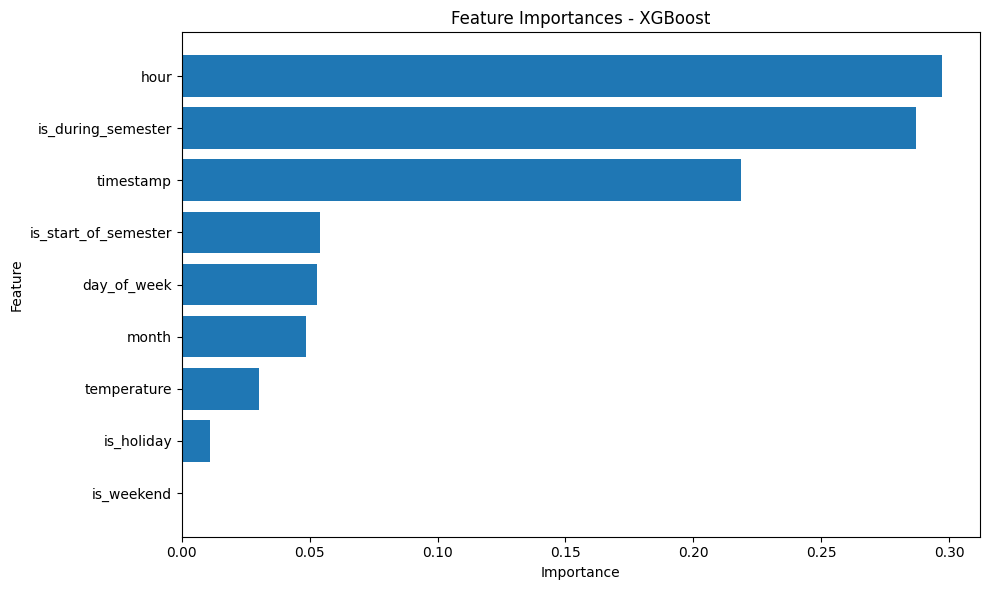

In [234]:
import matplotlib.pyplot as plt

importances = xgb_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(np.arange(len(importances)), features[sorted_idx])
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


---

### Model Comparision

In [235]:
import pandas as pd

results_data = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [MAE_LR, MAE_RF, MAE_XG],
    "RMSE": [RMSE_LR, RMSE_RF, RMSE_XG],
    "R2 Score": [R2_LR, R2_RF, R2_XG]
}

results_df = pd.DataFrame(results_data)
results_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,12.089516,15.830127,0.515151
1,Random Forest,4.349856,6.512617,0.917937
2,XGBoost,7.007246,10.227162,0.797629


In [236]:
results_df.style.format({
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R2 Score": "{:.4f}"
})

,Model,MAE,RMSE,R2 Score
0,Linear Regression,12.09,15.83,0.5152
1,Random Forest,4.35,6.51,0.9179
2,XGBoost,7.01,10.23,0.7976


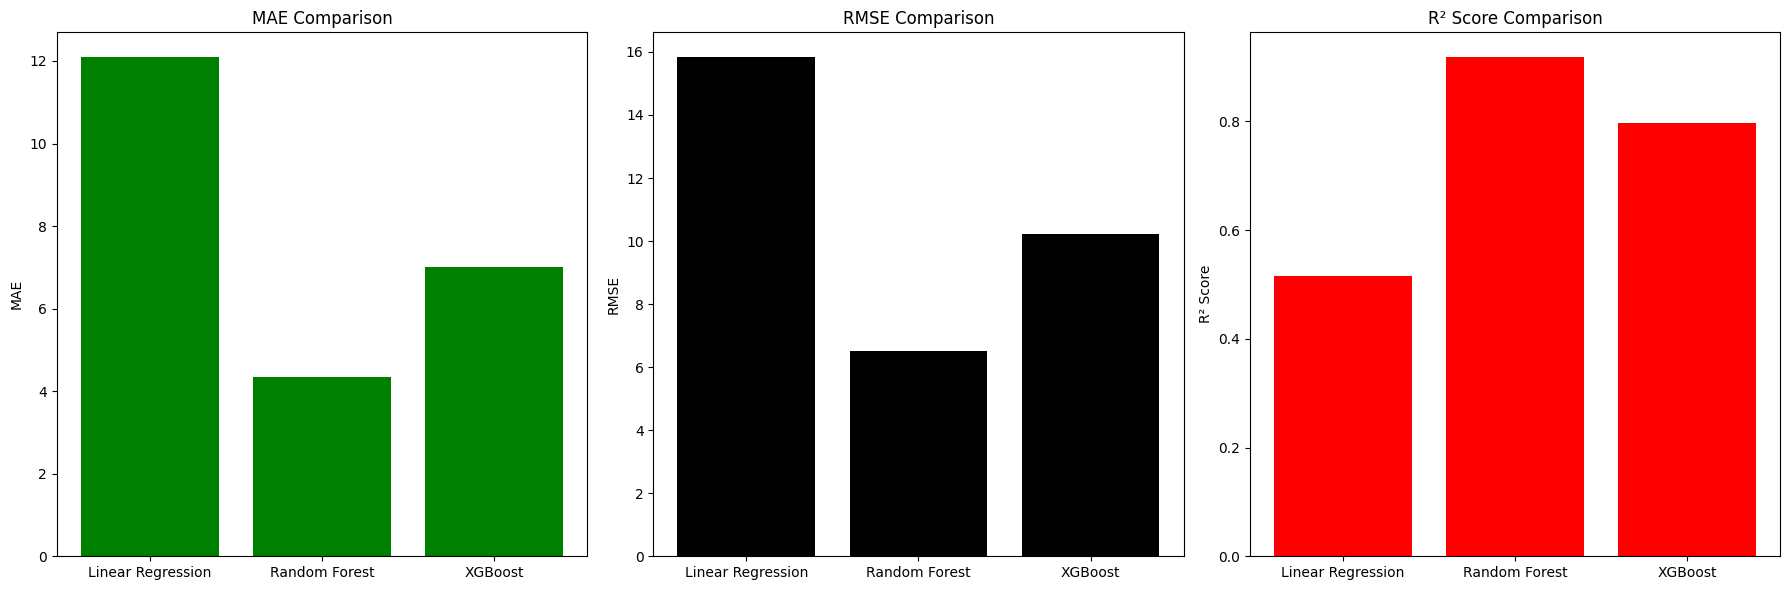

In [245]:
import matplotlib.pyplot as plt

# إعداد البيانات
models = ["Linear Regression", "Random Forest", "XGBoost"]
MAE = [MAE_LR, MAE_RF, MAE_XG]
RMSE =  [RMSE_LR, RMSE_RF, RMSE_XG]
R2 = [R2_LR, R2_RF, R2_XG]

x = range(len(models))

plt.figure(figsize=(18, 6))

# MAE
plt.subplot(1, 3, 1)
plt.bar(x, MAE, color='Green')
plt.xticks(x, models, rotation=0)
plt.title("MAE Comparison")
plt.ylabel("MAE")

# RMSE
plt.subplot(1, 3, 2)
plt.bar(x, RMSE, color='Black')
plt.xticks(x, models, rotation=0)
plt.title("RMSE Comparison")
plt.ylabel("RMSE")

# R2 Score
plt.subplot(1, 3, 3)
plt.bar(x, R2, color='Red')
plt.xticks(x, models, rotation=0)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()


##### _This is a comparative analysis of three regression models: Linear Regression, Random Forest, and XGBoost, using bar charts to visualize their performance across three key metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score. The first chart displays the MAE, showing that Random Forest has the lowest error, indicating superior accuracy in predicting values. Conversely, Linear Regression exhibits the highest MAE, suggesting it is the least accurate among the three._

##### _The second chart compares the RMSE, a metric that, like MAE, quantifies the average magnitude of the errors. Similar to the MAE results, Random Forest demonstrates the lowest RMSE, reinforcing its accuracy. Linear Regression, again, has the highest RMSE, confirming its relatively poor performance. The final chart illustrates the R² Score, which represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Here, Random Forest achieves the highest R² Score, indicating the best fit to the data, while Linear Regression has the lowest, suggesting a weaker fit._

##### _In conclusion, the visual and numerical data from the table clearly indicate that the Random Forest model outperforms both Linear Regression and XGBoost in terms of predictive accuracy and data fit. This is evidenced by its lowest MAE and RMSE values, coupled with the highest R² Score. Linear Regression, conversely, shows the poorest performance across all metrics, highlighting its limitations in accurately modeling the dataset. XGBoost, while not as effective as Random Forest, still manages to provide better results than Linear Regression, demonstrating a moderate level of accuracy and fit._

---